In [1]:
import WL as wl
import igraph as ig
import make_graph
import binvox_rw
import numpy as np
import torch
import networkx as nx
import grakel
import matplotlib.pyplot as plt
import make_graph_nx
from IPython.display import SVG, display
from mpl_toolkits.mplot3d import axes3d, Axes3D
from generate import SuperGenerator
from utils import generate_z
G=SuperGenerator()
with open ('chair1.binvox','rb')    as f1:
    model1 =binvox_rw.read_as_3d_array(f1)
with open ('chair4.binvox','rb')as f2:
    model2=binvox_rw.read_as_3d_array(f2)

def z_and_Gz(G):
    z=generate_z()
    voxels = G.generate(z, 'Chair')
    bool_voxels = voxels>0.5
    tr_vx=torch.transpose(bool_voxels,1,2)
    return z.to('cpu').detach().numpy().copy(),tr_vx.to('cpu').detach().numpy().copy(),torch.sum(tr_vx==True).to('cpu').detach().numpy().copy()

def vec_dis(zs,n):
    X=np.zeros((n,n))
    tmp_index=np.arange(n)
    xx, yy = np.meshgrid(tmp_index, tmp_index)
    zs_np=np.array(zs)
    distances=np.linalg.norm(zs_np[xx]-zs_np[yy], axis=2)
    return distances

def load_file_data(container,n):
    for i in range(1,n+1,1):
        with open ('../DeepIE3D_Training/data/chair64_512/chair'+str(i)+'.binvox','rb') as f:
            model=binvox_rw.read_as_3d_array(f)
            container.append(model.data)
    return container

def cmb_matrix(cnts,n):
    X=np.zeros((n,n))
    tmp_index=np.arange(n)
    xx, yy = np.meshgrid(tmp_index, tmp_index)
    cnts_np=np.array(cnts)
    multiples=cnts_np[xx]*cnts_np[yy]
    return multiples

def WeisfeilerLehman(voxels,n,_n_iter):
    trimed_voxels=[]
    G=[]
    for i in range(n):
        Gi,trimed_voxeli=make_graph_nx.convert_array_to_graph(voxels[i])
        G.append(Gi)
        trimed_voxels.append(trimed_voxeli)
    G_grakel=grakel.graph_from_networkx(G, node_labels_tag='label')
    gk=grakel.WeisfeilerLehman(n_iter=_n_iter,normalize=True)
    K=gk.fit_transform(G_grakel)
    return K,trimed_voxels,G

def single_WeisfeilerLehman(voxels1):
    G1,trimed_voxel=make_graph_nx.convert_array_to_graph(voxels1)
    G=[G1]
    G_grakel=grakel.graph_from_networkx(G, node_labels_tag='label')
    gk=grakel.WeisfeilerLehman()
    K=gk.fit_transform(G_grakel)
    return K,G1

def visualize(voxels):
    colors='red'
    fig = plt.figure()
    ax3 = fig.gca(projection='3d')
    ax3.voxels(voxels, facecolors=colors, edgecolor='k')
    plt.show()
    
def make_binvox(data,filename):
    voxels=binvox_rw.Voxels(data,[64,64,64], [0,0,0], 1, 'xyz')
    voxels.write('../DeepIE3D_Training/data/ex/'+filename+'.binvox')
        
    '''
instance=wl.WeisfeilerLehman()
graphs=[]
g=ig.Graph()
g.add_vertices(5)
g.add_edges([(0,1),(1,2),(0,3),(1,4)])
g.vs["label"]=[0,0,0,0,0]
#layout = g.layout("kk")
#ig.plot(g, layout = layout)
graphs.append(g)
print(instance.fit_transform(graphs,4) )

coords_arr = [[[False for k in range(64)] for j in range(64)] for i in range(64)]   #voxelが存在しているところが1
for i in range(64):
    coords_arr[i][0][0]=True
    coords_arr[i][1][0]=True
    coords_arr[i][2][0]=True
#print(make_graph.convert_array_to_graph(model.data))
'''

In [2]:

'''
G1=nx.Graph()
G1.add_nodes_from([0,1,2,3])
G1.add_edges_from([(0,1),(1,2),(0,3)])
nx.set_node_attributes(G1, {0:0, 1:0, 2:0,3:1}, 'label')
G1.add_node(4,label=2)
print(G1.nodes[4]['label'])
G=[G1]
G_grakel=grakel.graph_from_networkx(G, node_labels_tag='label')
gk=grakel.WeisfeilerLehman()
K=gk.fit_transform(G_grakel)
print(K)


zs=[]
voxels=[]
cnts=[]
n=10
for i in range(n):
    z,voxel,cnt=z_and_Gz(G)
    zs.append(z)
    voxels.append(voxel)
    cnts.append(cnt)


print(vec_dis(zs,n))
K,trimed_voxels=WeisfeilerLehman(voxels,n,5)
X=cmb_matrix(cnts,n)
print(K)
for i in range(n):
    visualize(trimed_voxels[i])
    visualize(voxels[i])
    print(zs[i])

#visualize(trimed_voxel1)
#visualize(trimed_voxel2)

G1=make_graph_nx.convert_array_to_graph(voxels1)
G2=make_graph_nx.convert_array_to_graph(voxels2)

#G1=make_graph_nx.convert_array_to_graph(model1.data)
#nx.write_gexf(G1,'chair1.gexf')

G=[G1,G2]
J=[G1,G1]
G_grakel=grakel.graph_from_networkx(G, node_labels_tag='label')
gk=grakel.WeisfeilerLehman(n_iter=10)
K=gk.fit_transform(G_grakel)
print(K)
J_grakel=grakel.graph_from_networkx(J, node_labels_tag='label')
gk=grakel.WeisfeilerLehman(n_iter=10)
K=gk.fit_transform(J_grakel)
print(K)
'''

"\nG1=nx.Graph()\nG1.add_nodes_from([0,1,2,3])\nG1.add_edges_from([(0,1),(1,2),(0,3)])\nnx.set_node_attributes(G1, {0:0, 1:0, 2:0,3:1}, 'label')\nG1.add_node(4,label=2)\nprint(G1.nodes[4]['label'])\nG=[G1]\nG_grakel=grakel.graph_from_networkx(G, node_labels_tag='label')\ngk=grakel.WeisfeilerLehman()\nK=gk.fit_transform(G_grakel)\nprint(K)\n\n\nzs=[]\nvoxels=[]\ncnts=[]\nn=10\nfor i in range(n):\n    z,voxel,cnt=z_and_Gz(G)\n    zs.append(z)\n    voxels.append(voxel)\n    cnts.append(cnt)\n\n\nprint(vec_dis(zs,n))\nK,trimed_voxels=WeisfeilerLehman(voxels,n,5)\nX=cmb_matrix(cnts,n)\nprint(K)\nfor i in range(n):\n    visualize(trimed_voxels[i])\n    visualize(voxels[i])\n    print(zs[i])\n\n#visualize(trimed_voxel1)\n#visualize(trimed_voxel2)\n\nG1=make_graph_nx.convert_array_to_graph(voxels1)\nG2=make_graph_nx.convert_array_to_graph(voxels2)\n\n#G1=make_graph_nx.convert_array_to_graph(model1.data)\n#nx.write_gexf(G1,'chair1.gexf')\n\nG=[G1,G2]\nJ=[G1,G1]\nG_grakel=grakel.graph_from_netwo

In [3]:
'''
voxels=[]
n=1
load_file_data(voxels,n)
K,trimed_voxels,G=WeisfeilerLehman(voxels,n,10)
print(K)
svg = SVG(nx.nx_agraph.to_agraph(G[0]).draw(prog='fdp', format='svg'))
display(svg)
#for i in range(n):
    #visualize(trimed_voxels[i])
'''    
    

"\nvoxels=[]\nn=1\nload_file_data(voxels,n)\nK,trimed_voxels,G=WeisfeilerLehman(voxels,n,10)\nprint(K)\nsvg = SVG(nx.nx_agraph.to_agraph(G[0]).draw(prog='fdp', format='svg'))\ndisplay(svg)\n#for i in range(n):\n    #visualize(trimed_voxels[i])\n"

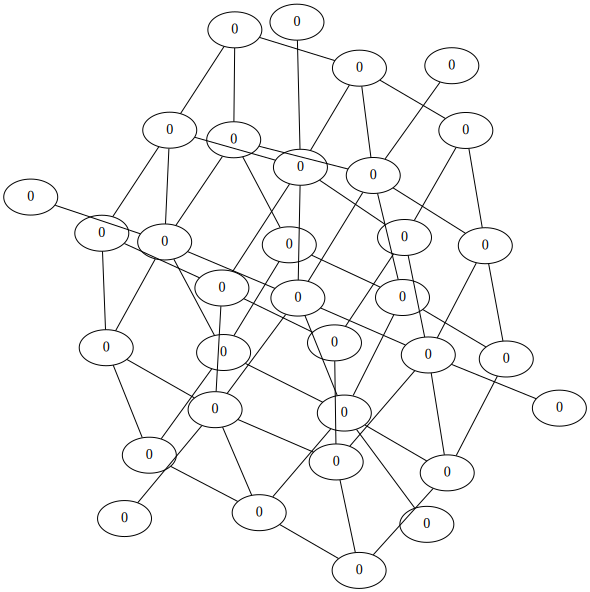

In [4]:

coords_arr = [[[False for k in range(64)] for j in range(64)] for i in range(64)]
for i in range(5):
    for j in range(5):
        for k in range(5):
             if np.linalg.norm(np.array([i-2,j-2,k-2]))<=2 :
                    coords_arr[i][j][k]=True
#make_binvox(np.array(coords_arr),'sphere3')
_,G1=single_WeisfeilerLehman(coords_arr)
svg = SVG(nx.nx_agraph.to_agraph(G1).draw(prog='fdp', format='svg'))
display(svg)